In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
NUM_BINS = 10  # n: for [0-n]
TITLE = "Economics Fall semester result" # set a title
FIG_SIZE = (12, 7) # adjust figure size
PLANK = -1 # if x >= PLANK, else: skip
MAX_MARK = 10 # x = min(MAX_MARK, x)
MY_MARK = -1 # add your mark as line, -1 for disable
SCALE_FACTOR = 1

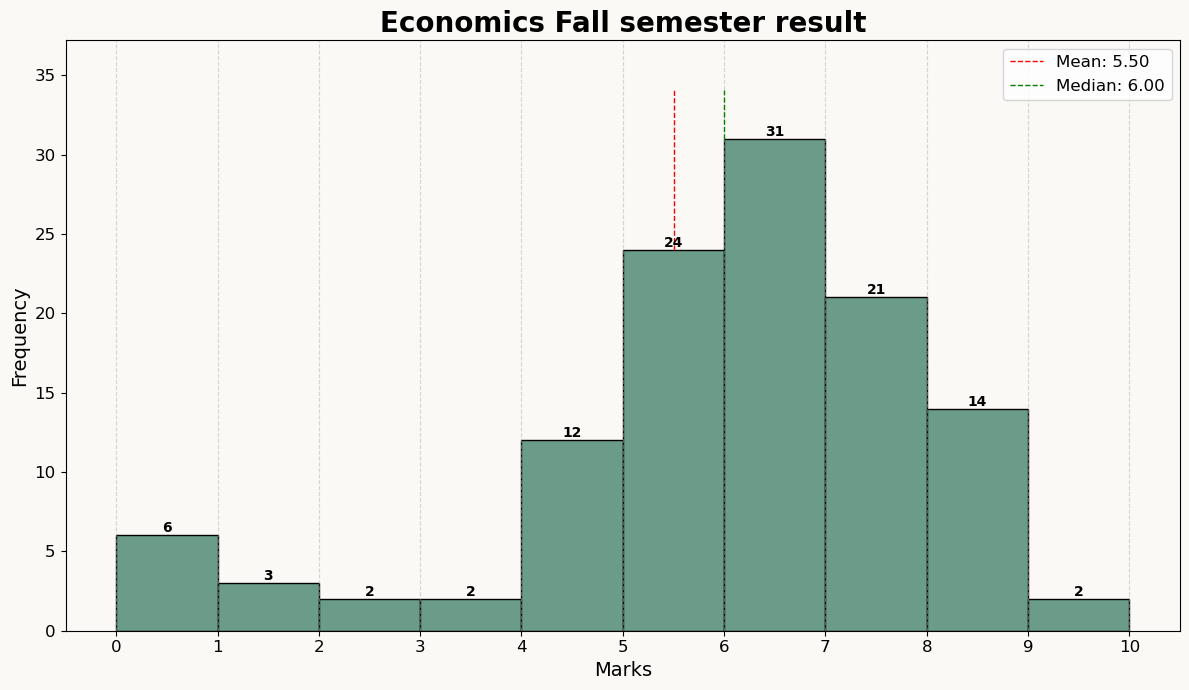

Quartiles:
0.25    5.0
0.50    6.0
0.75    7.0
dtype: float64


In [31]:
# Load and process data
marks = []
with open('simple_data.txt', 'r') as file:
    for line in file:
        try:
            marks.append(float(line.strip().replace(',', '.')))
        except: 
            for x in line.strip().split():
                marks.append(float(x.strip().replace(',', '.')))

marks = [SCALE_FACTOR*min(x, MAX_MARK) for x in marks if x >= PLANK]
marks_series = pd.Series(marks)

# Calculate statistics
mean = marks_series.mean()
median = marks_series.median()
mode = marks_series.mode().iloc[0] if not marks_series.mode().empty else None
std_dev = marks_series.std()
quartiles = marks_series.quantile([0.25, 0.5, 0.75])

# Create the plot
fig, ax = plt.subplots(figsize=FIG_SIZE)

# Set the background color 
fig.patch.set_facecolor('#FAF9F6')
ax.set_facecolor('#FAF9F6')

# Plot histogram
n, bins, patches = ax.hist(marks_series, bins=range(NUM_BINS + 1), edgecolor='black', alpha=1, color="#6A9C89")

# Customize the plot
ax.set_title(TITLE, fontsize=20, fontweight='bold')
ax.set_xlabel('Marks', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add labels for bins
for i in range(len(n)):
    ax.text((bins[i] + bins[i+1])/2, n[i], int(n[i]), 
            ha='center', va='bottom', fontweight='bold', fontsize=10)

# Get the maximum height of the histogram
max_height = max(n)

# Add a line for the mean above the histogram
mean_bin = int(mean)
mean_height = n[mean_bin] if mean_bin < len(n) else 0
ax.plot([mean, mean], [mean_height, max_height * 1.1], color='red', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')

# Add a line for the median above the histogram
median_bin = int(median)
median_height = n[median_bin] if median_bin < len(n) else 0
ax.plot([median, median], [median_height, max_height * 1.1], color='green', linestyle='--', linewidth=1, label=f'Median: {median:.2f}')

# Add a line for MY_MARK if it's not -1
if MY_MARK != -1:
    my_mark_bin = int(MY_MARK)
    my_mark_height = n[my_mark_bin] if my_mark_bin < len(n) else 0
    ax.plot([MY_MARK, MY_MARK], [my_mark_height, max_height * 1.1], color='blue', linestyle='--', linewidth=1, label=f'My Mark: {MY_MARK:.2f}')

# Customize the legend
ax.legend(loc='upper right', fontsize=12)

# Set x-axis ticks for each integer from 0 to NUM_BINS
ax.set_xticks(range(NUM_BINS+1))
ax.set_xticklabels(range(NUM_BINS+1))

# Add grid lines for x-axis
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust y-axis to accommodate the lines
ax.set_ylim(0, max_height * 1.2)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print additional statistics
print(f"Quartiles:\n{quartiles}")

In [32]:
NUM_BINS = 11  # 0 to 10, inclusive

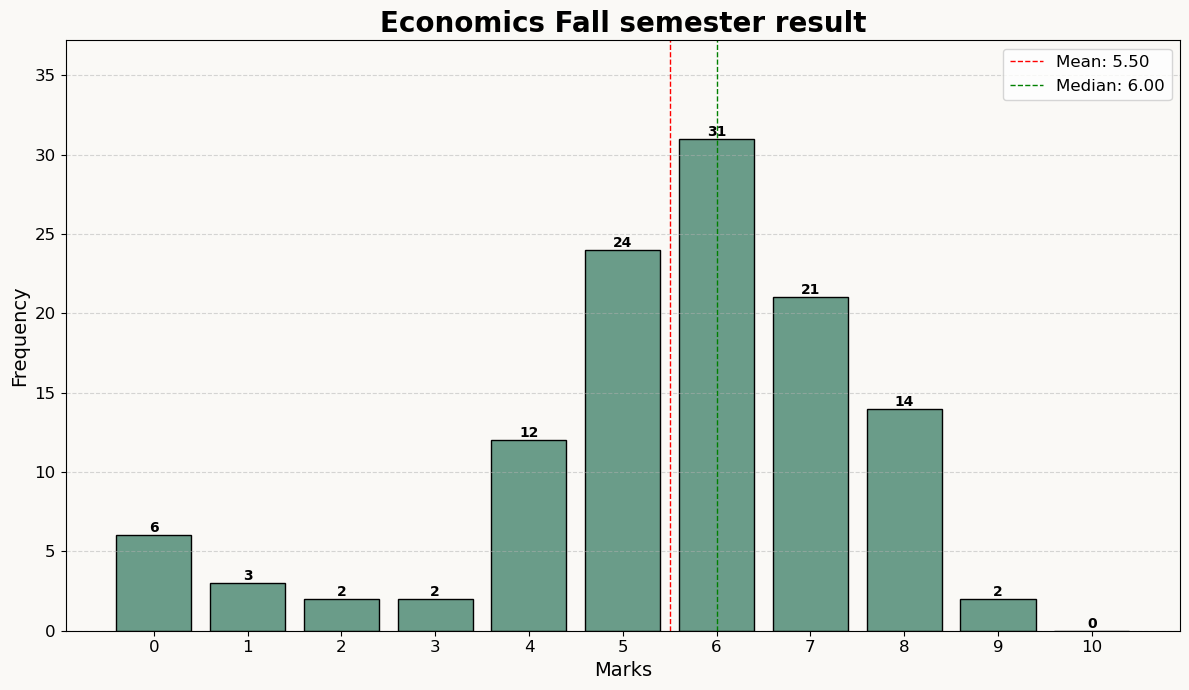

Quartiles:
0.25    5.0
0.50    6.0
0.75    7.0
dtype: float64


In [33]:
# Load and process data
marks = []
with open('simple_data.txt', 'r') as file:
    for line in file:
        try:
            marks.append(float(line.strip().replace(',', '.')))
        except:
            for x in line.strip().split():
                marks.append(float(x.strip().replace(',', '.')))

# Filter and round marks
marks = [round(SCALE_FACTOR * min(x, MAX_MARK)) for x in marks if x >= PLANK]

# Count occurrences of each integer mark
mark_counts = {i: marks.count(i) for i in range(NUM_BINS)}

# Create the plot
fig, ax = plt.subplots(figsize=FIG_SIZE)

# Set the background color
fig.patch.set_facecolor('#FAF9F6')
ax.set_facecolor('#FAF9F6')

# Create bar chart
bars = ax.bar(range(NUM_BINS), [mark_counts[i] for i in range(NUM_BINS)], 
              edgecolor='black', color="#6A9C89")

# Customize the plot
ax.set_title(TITLE, fontsize=20, fontweight='bold')
ax.set_xlabel('Marks', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add labels for bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

# Set x-axis ticks for each integer from 0 to 10
ax.set_xticks(range(NUM_BINS))
ax.set_xticklabels(range(NUM_BINS))

# Add grid lines for y-axis
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Calculate statistics for integer marks
marks_series = pd.Series(marks)
mean = marks_series.mean()
median = marks_series.median()
mode = marks_series.mode().iloc[0] if not marks_series.mode().empty else None

# Add lines for mean and median
max_height = max(mark_counts.values())
ax.axvline(mean, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')
ax.axvline(median, color='green', linestyle='--', linewidth=1, label=f'Median: {median:.2f}')

# Add a line for MY_MARK if it's not -1
if MY_MARK != -1 and MY_MARK.is_integer() and 0 <= MY_MARK <= 10:
    ax.axvline(MY_MARK, color='blue', linestyle='--', linewidth=1, label=f'My Mark: {MY_MARK:.0f}')

# Customize the legend
ax.legend(loc='upper right', fontsize=12)

# Adjust y-axis to accommodate the lines
ax.set_ylim(0, max_height * 1.2)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print additional statistics
quartiles = marks_series.quantile([0.25, 0.5, 0.75])
print(f"Quartiles:\n{quartiles}")

0 1 6 4 8 6 6 6 5 6 7 7 7 6 8 7 8 6 6 5 9 9 7 4 5 8 5 7 5 2 8 7 5 5 4 5 6 6 5 8 8 7 0 5 4 8 6 5 6 7 7 0 8 6 1 5 5 7 5 5 6 4 6 7 4 7 7 5 0 3 0 4 4 6 6 8 6 3 6 7 6 6 4 4 7 6 1 7 2 6 5 6 5 8 6 7 7 8 6 7 8 5 0 4 6 5 5 6 7 6 8 5 5 6 4 6 5